In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls ./drive/MyDrive/T-brain/2022/.

public_train_x_ccba_full_hashed.csv	 public_x_alert_date.csv
public_train_x_cdtx0001_full_hashed.csv  submit_sample.csv
public_train_x_custinfo_full_hashed.csv  train_x_alert_date.csv
public_train_x_dp_full_hashed.csv	 train_y_answer.csv
public_train_x_remit1_full_hashed.csv


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt


In [4]:
path = './drive/MyDrive/T-brain/2022'

# 信用卡交易
ccba = pd.read_csv(f'{path}/public_train_x_ccba_full_hashed.csv')

# 顧客消費資訊(日期、消費地國別、消費地幣別、金額)
cdtx = pd.read_csv(f'{path}/public_train_x_cdtx0001_full_hashed.csv')

# 顧客資訊
custinfo = pd.read_csv(f'{path}/public_train_x_custinfo_full_hashed.csv')

# 顧客交易資訊(交易日期、金額、匯率、交易代碼、分行代碼)
dp = pd.read_csv(f'{path}/public_train_x_dp_full_hashed.csv')

# 外匯交易
remit = pd.read_csv(f'{path}/public_train_x_remit1_full_hashed.csv')

# 警告資訊
public_x_alert_date = pd.read_csv(f'{path}/public_x_alert_date.csv')
train_x_alert_date = pd.read_csv(f'{path}/train_x_alert_date.csv')

# 警告資訊與報SAR關係
y = pd.read_csv(f'{path}/train_y_answer.csv')

# 提交範例
pred_example = pd.read_csv(f'{path}/submit_sample.csv')

In [ ]:
# 上月繳款總額、帳務年月、信用額度、已使用額度、本月分歧預借現金金額、本月分期消費金額、本月消費金額、本月借現金額
ccba.head()

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 消費日期、消費地國別、消費地幣別、交易金額交易金額(台幣)
cdtx.head()

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0


In [ ]:
# 借貸別、交易日期、交易時間、交易類別、交易金額、匯率、資訊資產代號、交易代碼、分行代碼、是否為跨行交易、是否為實體是否為實體ATM交易
dp.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0


In [ ]:
# 外匯交易日、交易編號、交易金額交易金額(折合美金)
remit.head()

,cust_id,trans_date,trans_no,trade_amount_usd
0,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,148,0,100528.0
1,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,165,0,100528.0
2,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,231,0,89479.0
3,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,291,0,100528.0
4,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,389,0,30158.0


In [ ]:
# 風險等級、職業、行內總資產、年齡
custinfo.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5


In [ ]:
# public_x_alert_date, : alert_key, date
# public_x_alert_date: 1845x2 --> pred
# train_x_alert_date: 23906x2 --> train
# y: 23906x2 --> train

public_x_alert_date.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [ ]:
label = train_x_alert_date.merge(y, on='alert_key', how='left')

# sar_flag
# 0:    23672
# 1:      234

In [ ]:
label.head()

,alert_key,date,sar_flag
0,171189,0,0
1,171202,0,0
2,171599,0,0
3,171737,0,0
4,171142,0,0


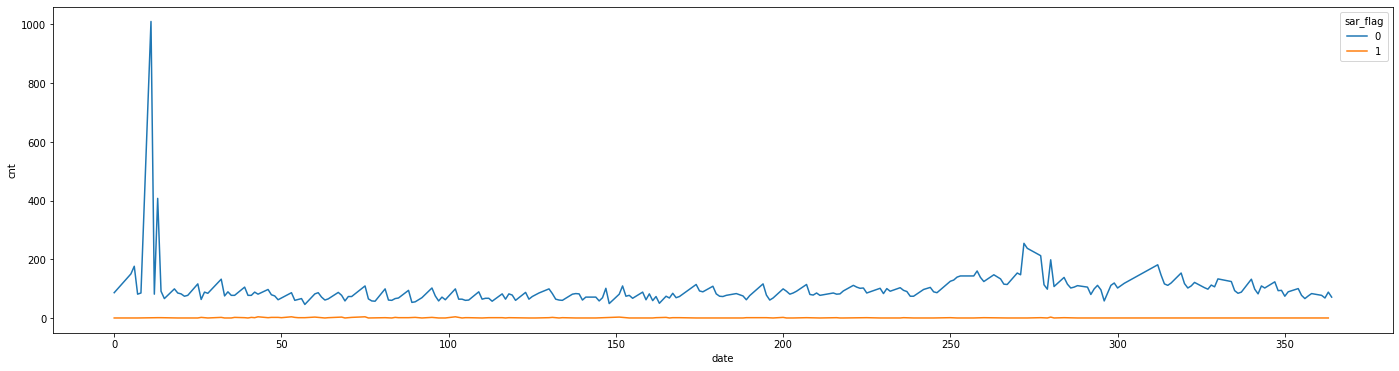

In [ ]:
d = label.groupby(['date', 'sar_flag']).size().reset_index(name='cnt')

plt.figure(figsize=(24,6))
sns.lineplot(x='date', y='cnt', hue='sar_flag', data=d)

In [ ]:
d[d['sar_flag']==1].sort_values(by='cnt', ascending=False).head(20)

,date,sar_flag,cnt
51,43,1,5
90,75,1,5
63,53,1,5
122,102,1,5
310,280,1,4
82,68,1,4
72,60,1,4
180,151,1,4
88,71,1,3
113,95,1,3


In [ ]:
custinfo.shape

(25751, 6)

In [ ]:
label.shape

(23906, 3)

In [ ]:
cust_alert = custinfo.merge(label, on='alert_key', how='right')
cust_data = custinfo.merge(label, on='alert_key', how='outer')

In [ ]:
cust_alert.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,171189,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,375576.0,4,0,0
1,171202,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2717416.0,2,0,0
2,171599,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,326517.0,4,0,0
3,171737,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,1014759.0,4,0,0
4,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0


In [ ]:
cust_alert_dist = cust_alert.query('sar_flag==1').groupby('date')['cust_id'].nunique().reset_index()

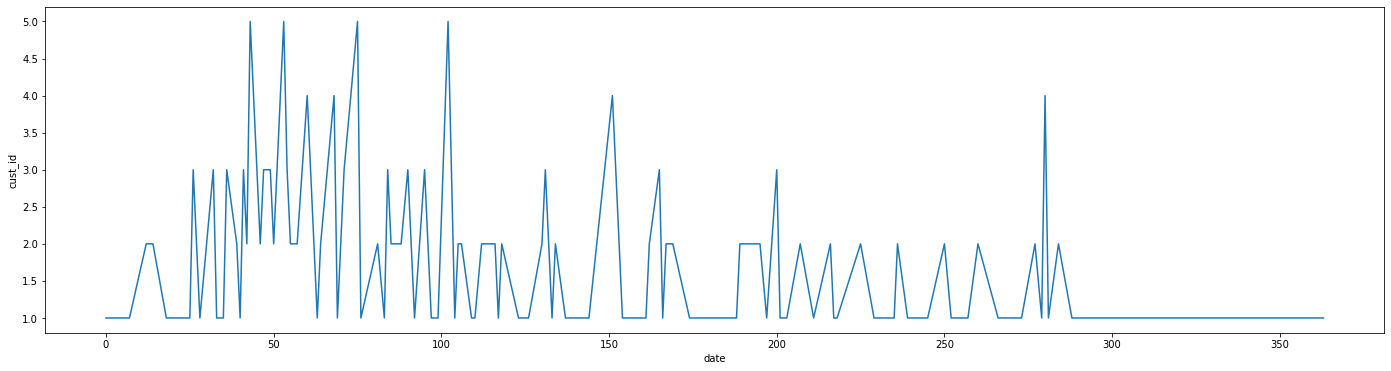

In [ ]:
plt.figure(figsize=(24,6))
sns.lineplot(x='date', y='cust_id', data=cust_alert_dist)

In [ ]:
cust_alert_dist = cust_alert.groupby(['date', 'sar_flag'])['cust_id'].nunique().reset_index()

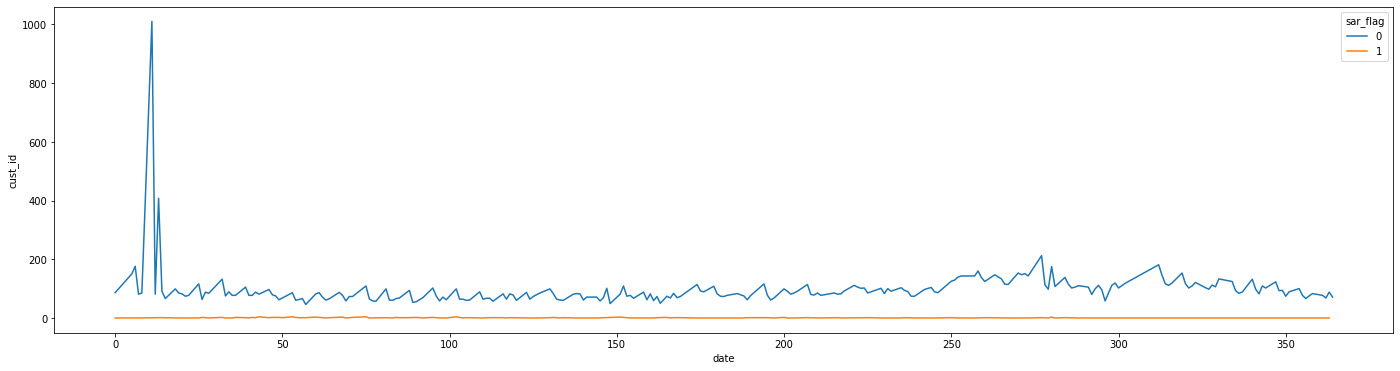

In [ ]:
plt.figure(figsize=(24,6))
sns.lineplot(x='date', y='cust_id', hue='sar_flag', data=cust_alert_dist)

In [ ]:
cust_alert.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'AGE', 'date', 'sar_flag'],
      dtype='object')

In [ ]:
cust_alert_age = cust_alert.groupby(['AGE', 'sar_flag']).size().reset_index(name='cnt')

In [ ]:
cust_alert_age.columns

Index(['AGE', 'sar_flag', 'cnt'], dtype='object')

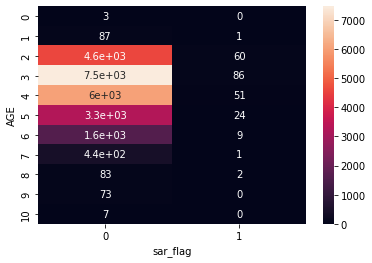

In [ ]:
# AGE: 3 > 4 > 2 > 5 > 6 > 7 > ...
sns.heatmap(cust_alert_age.pivot(index='AGE', columns='sar_flag', values='cnt').fillna(0), annot=True)

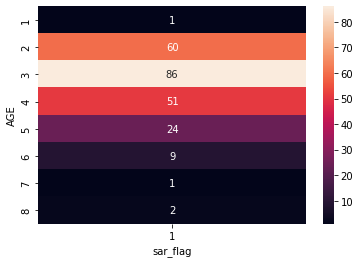

In [ ]:
cust_alert_age = cust_alert.query('sar_flag==1').groupby(['AGE', 'sar_flag']).size().reset_index(name='cnt')
sns.heatmap(cust_alert_age.pivot(index='AGE', columns='sar_flag', values='cnt').fillna(0), annot=True)

In [ ]:
cust_alert_risk = cust_alert.groupby(['risk_rank', 'sar_flag']).size().reset_index(name='cnt')

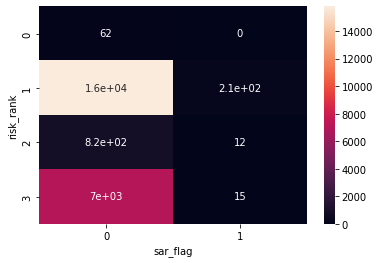

In [ ]:
# risk_rank: 1 > 3 > 2 > 0
sns.heatmap(cust_alert_risk.pivot(index='risk_rank', columns='sar_flag', values='cnt').fillna(0), annot=True)

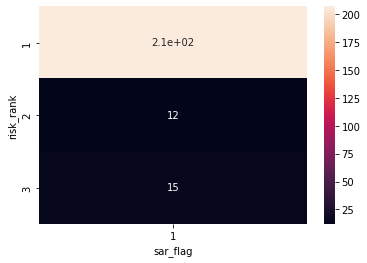

In [ ]:
cust_alert_risk = cust_alert.query('sar_flag==1').groupby(['risk_rank', 'sar_flag']).size().reset_index(name='cnt')
sns.heatmap(cust_alert_risk.pivot(index='risk_rank', columns='sar_flag', values='cnt').fillna(0), annot=True)

In [ ]:
y.shape

(23906, 2)

In [ ]:
y.head()

,alert_key,sar_flag
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0


In [ ]:
pred_example.shape

(3850, 2)

In [ ]:
pred_example.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [ ]:
a = set(pred_example.alert_key)
b = set(y.alert_key)
c = set(public_x_alert_date.alert_key)

In [ ]:
len(a & b)

0

In [ ]:
len(a & c)

1845

In [ ]:
public_x_alert_date.shape

(1845, 2)

In [ ]:
public_x_alert_date

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365
...,...,...
1840,364472,393
1841,364788,393
1842,364673,393
1843,364626,393


In [ ]:
a = set(pred_example.alert_key)

b = set(y.alert_key)

# 前14天前的交易衍伸變數做偵測
# 交易水位變化
# 自身習慣

合併所有資料

In [5]:
label = train_x_alert_date.merge(y, on='alert_key', how='left')
cust_alert = custinfo.merge(label, on='alert_key', how='right')

cust_alert.query('sar_flag == 1')

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
44,171770,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,0,1
136,172480,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,3,12.0,8251.0,4,5,1
448,174298,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,1,19.0,186714.0,7,7,1
1609,177960,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,1,9.0,238193.0,2,12,1
1611,177788,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,1,15.0,1744729.0,5,12,1
...,...,...,...,...,...,...,...,...
23164,346021,9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...,1,13.0,310.0,3,351,1
23308,347051,a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...,2,11.0,258763.0,3,355,1
23368,347894,9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...,1,17.0,337845.0,5,356,1
23572,348724,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,2,358,1


In [ ]:
cust_alert.query('sar_flag == 1').alert_key.nunique()

234

In [ ]:
# set(ccba.cust_id) & set(cust_alert.query('sar_flag == 1').cust_id)

In [ ]:
ccba.head()

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
record = list()

for c in cust_alert.query('sar_flag == 1').cust_id.unique():

  temp = list()
  temp.append(c)
  temp.append(len(ccba.query(f'cust_id == "{c}"')))
  temp.append(len(cdtx.query(f'cust_id == "{c}"')))
  temp.append(len(dp.query(f'cust_id == "{c}"')))
  temp.append(len(remit.query(f'cust_id == "{c}"')))

  record.append(temp)

sar_cust_data = pd.DataFrame(record, columns=['cust_id','ccba_cnt','cdtx_cnt','dp_cnt','remit_cnt'])

In [ ]:
sar_cust_data.head()

,cust_id,ccba_cnt,cdtx_cnt,dp_cnt,remit_cnt
0,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,13,28,48,0
1,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,13,374,160,0
2,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,13,206,822,12
3,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,13,318,1096,0
4,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,13,317,957,0


In [ ]:
sar_cust_data.describe()

,ccba_cnt,cdtx_cnt,dp_cnt,remit_cnt
count,233.000000,233.000000,233.00000,233.000000
mean,7.622318,785.424893,1068.72103,22.334764
std,6.282421,7871.715938,3324.54034,40.198853
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,231.00000,0.000000
50%,13.000000,1.000000,469.00000,0.000000
75%,13.000000,150.000000,996.00000,34.000000
max,13.000000,118189.000000,45305.00000,215.000000


In [ ]:
nosar_cust_id = set(cust_alert.cust_id.unique()) - set(cust_alert.query('sar_flag == 1').cust_id.unique())

record = list()

for c in nosar_cust_id:

  temp = list()
  temp.append(c)
  temp.append(len(ccba.query(f'cust_id == "{c}"')))
  temp.append(len(cdtx.query(f'cust_id == "{c}"')))
  temp.append(len(dp.query(f'cust_id == "{c}"')))
  temp.append(len(remit.query(f'cust_id == "{c}"')))

  record.append(temp)

nosar_cust_data = pd.DataFrame(record, columns=['cust_id','ccba_cnt','cdtx_cnt','dp_cnt','remit_cnt'])

In [ ]:
nosar_cust_data.describe()

,ccba_cnt,cdtx_cnt,dp_cnt,remit_cnt
count,7031.000000,7031.000000,7031.000000,7031.000000
mean,7.631774,116.656663,234.849524,1.628929
std,6.264325,375.019207,2018.317163,12.060415
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,0.000000
50%,13.000000,1.000000,65.000000,0.000000
75%,13.000000,111.500000,200.000000,0.000000
max,13.000000,16259.000000,135100.000000,432.000000


In [ ]:
sar_cust_data['sar_flag'] = 1
nosar_cust_data['sar_flag'] = 0
sar_and_nosar_data = pd.concat([sar_cust_data, nosar_cust_data], axis=0)

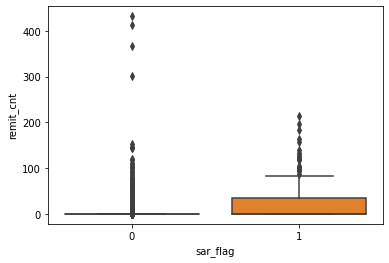

In [ ]:
sns.boxplot(x='sar_flag', y='remit_cnt', data=sar_and_nosar_data)

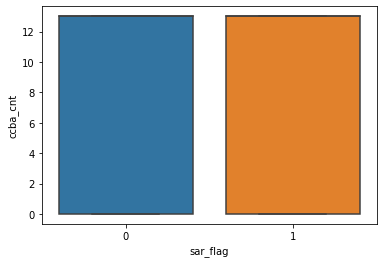

In [ ]:
sns.boxplot(x='sar_flag', y='ccba_cnt', data=sar_and_nosar_data)

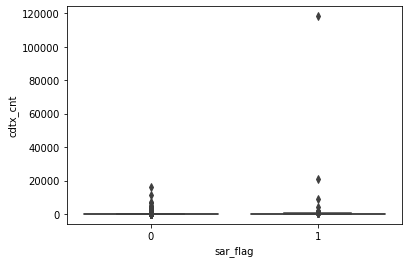

In [ ]:
sns.boxplot(x='sar_flag', y='cdtx_cnt', data=sar_and_nosar_data)

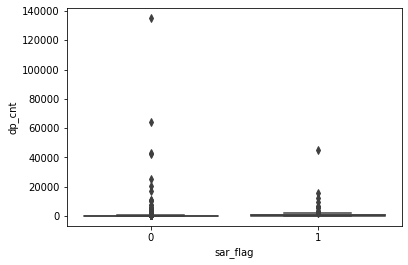

In [ ]:
sns.boxplot(x='sar_flag', y='dp_cnt', data=sar_and_nosar_data)

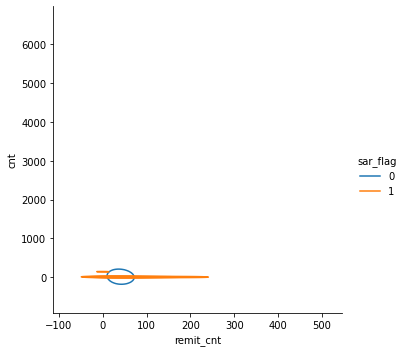

In [ ]:
sns.displot(data=sar_and_nosar_data.groupby(['sar_flag','remit_cnt']).size().reset_index(name='cnt'), 
             x='remit_cnt',
             y='cnt',
             hue='sar_flag',
            kind='kde')

In [ ]:
cust_alert

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,171189,972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...,1,17.0,375576.0,4,0,0
1,171202,a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...,3,12.0,2717416.0,2,0,0
2,171599,3433ecc068ed1c9e2f5037cab5d42d7b901e9bd624c1fb...,1,12.0,326517.0,4,0,0
3,171737,a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...,3,14.0,1014759.0,4,0,0
4,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0
...,...,...,...,...,...,...,...,...
23901,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,364,0
23902,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0
23903,352080,1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...,2,9.0,69080.0,6,364,0
23904,352075,9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...,3,3.0,262604.0,6,364,0


In [ ]:
cdtx

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0
...,...,...,...,...,...
1043009,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0
1043010,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0
1043011,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0
1043012,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0


In [6]:
cust_cdtx = cdtx.merge(cust_alert, on=['cust_id', 'date'], how='left')

In [ ]:
cust_cdtx[['cust_id','date','sar_flag']].groupby(['cust_id','date','sar_flag']).size().reset_index(name='cnt').sort_values(by=['sar_flag','cnt'], ascending=False).head()

,cust_id,date,sar_flag,cnt
3618,77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...,112,1.0,139
2205,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,71,1.0,102
4351,98de6f9a9f873408729fb8551285a1ab8f18d74aa1eae3...,277,1.0,79
3177,6596eee15f44793cc3cb6db410581353cbee3051cbc6d3...,277,1.0,9
3327,6dd542e664442f3b395664e727a58bb9d5ea2e5f2c5549...,257,1.0,7


In [ ]:
cust_cdtx[['cust_id','date','sar_flag']].groupby(['cust_id','date','sar_flag']).size().reset_index(name='cnt').sort_values(by=['cnt'], ascending=False).head(50)

,cust_id,date,sar_flag,cnt
2193,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,46,0.0,943
2201,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,62,0.0,736
2199,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,56,0.0,620
2191,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,42,0.0,610
2194,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,47,0.0,608
2186,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,34,0.0,543
2189,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,39,0.0,509
2185,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,33,0.0,489
2187,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,35,0.0,471
2203,4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...,64,0.0,462


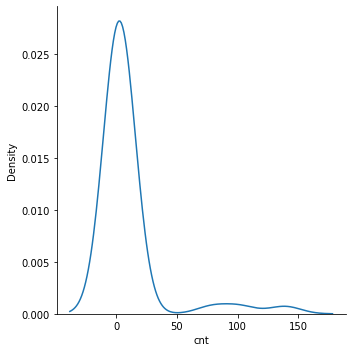

In [ ]:
d = cust_cdtx[['cust_id','date','sar_flag']].groupby(['cust_id','date','sar_flag']).size().reset_index(name='cnt')

sns.displot(x='cnt', data=d.query('sar_flag==1 and cnt < 160'), kind="kde")

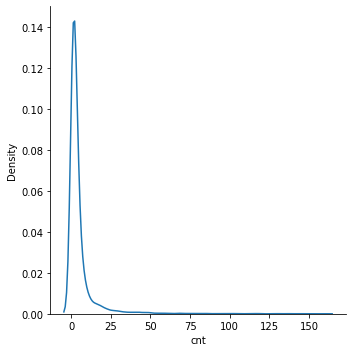

In [ ]:
sns.displot(x='cnt', data=d.query('sar_flag==0 and cnt < 160'), kind="kde")

In [7]:
cust_cdtx

,cust_id,date,country,cur_type,amt,alert_key,risk_rank,occupation_code,total_asset,AGE,sar_flag
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1043152,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0,NaN,NaN,NaN,NaN,NaN,NaN
1043153,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0,NaN,NaN,NaN,NaN,NaN,NaN
1043154,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0,NaN,NaN,NaN,NaN,NaN,NaN
1043155,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cdtx

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0
...,...,...,...,...,...
1043009,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0
1043010,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0
1043011,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0
1043012,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


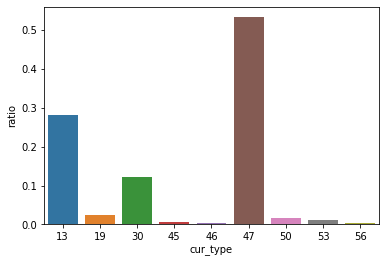

In [15]:
d = cust_cdtx[['cur_type','sar_flag']].groupby(['cur_type','sar_flag']).size().reset_index(name='cnt')

d1 = d.query('sar_flag==1')
d1['ratio'] = d1['cnt']/d1['cnt'].sum()

d2 = d.query('sar_flag==0')
d2['ratio'] = d2['cnt']/d2['cnt'].sum()


sns.barplot(x='cur_type', y='ratio', data=d1)

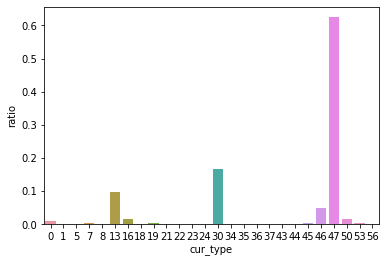

In [17]:
sns.barplot(x='cur_type', y='ratio', data=d2)

In [18]:
cust_cdtx

,cust_id,date,country,cur_type,amt,alert_key,risk_rank,occupation_code,total_asset,AGE,sar_flag
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1043152,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0,NaN,NaN,NaN,NaN,NaN,NaN
1043153,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0,NaN,NaN,NaN,NaN,NaN,NaN
1043154,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0,NaN,NaN,NaN,NaN,NaN,NaN
1043155,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cust_cdtx.dtypes

cust_id             object
date                 int64
country              int64
cur_type             int64
amt                float64
alert_key          float64
risk_rank          float64
occupation_code    float64
total_asset        float64
AGE                float64
sar_flag           float64
dtype: object

In [31]:
d = cust_cdtx.copy()
d['mix_country_cur_type'] = d['country']*100 + d['cur_type']

In [32]:
d

,cust_id,date,country,cur_type,amt,alert_key,risk_rank,occupation_code,total_asset,AGE,sar_flag,mix_country_cur_type
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0,NaN,NaN,NaN,NaN,NaN,NaN,177
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0,NaN,NaN,NaN,NaN,NaN,NaN,177
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0,NaN,NaN,NaN,NaN,NaN,NaN,177
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0,NaN,NaN,NaN,NaN,NaN,NaN,177
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0,NaN,NaN,NaN,NaN,NaN,NaN,177
...,...,...,...,...,...,...,...,...,...,...,...,...
1043152,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0,NaN,NaN,NaN,NaN,NaN,NaN,177
1043153,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0,NaN,NaN,NaN,NaN,NaN,NaN,177
1043154,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0,NaN,NaN,NaN,NaN,NaN,NaN,177
1043155,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0,NaN,NaN,NaN,NaN,NaN,NaN,177


In [34]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
d['mix_country_cur_type_le'] = labelencoder.fit_transform(d['mix_country_cur_type'])

In [35]:
d

,cust_id,date,country,cur_type,amt,alert_key,risk_rank,occupation_code,total_asset,AGE,sar_flag,mix_country_cur_type,mix_country_cur_type_le
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043152,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
1043153,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
1043154,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149
1043155,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0,NaN,NaN,NaN,NaN,NaN,NaN,177,149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


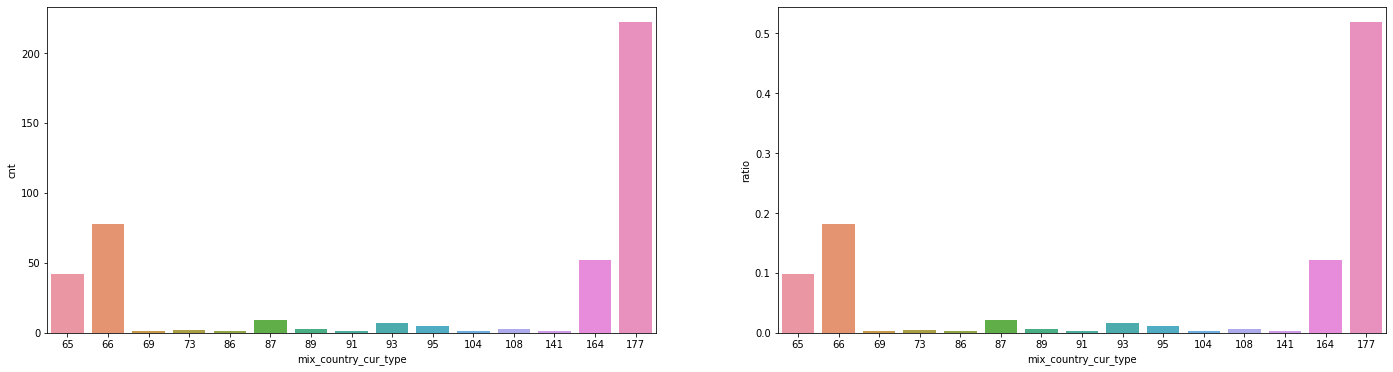

In [46]:
d0 = d.groupby(['mix_country_cur_type','sar_flag']).size().reset_index(name='cnt')
d1 = d0.query('sar_flag==1')
d1['ratio'] = d1['cnt']/d1['cnt'].sum()

d2 = d0.query('sar_flag==0')
d2['ratio'] = d2['cnt']/d2['cnt'].sum()

plt.figure(figsize=(24,6))
plt.subplot(1, 2, 1)
sns.barplot(x='mix_country_cur_type', y='cnt', data=d1)

plt.subplot(1, 2, 2)
sns.barplot(x='mix_country_cur_type', y='ratio', data=d1)


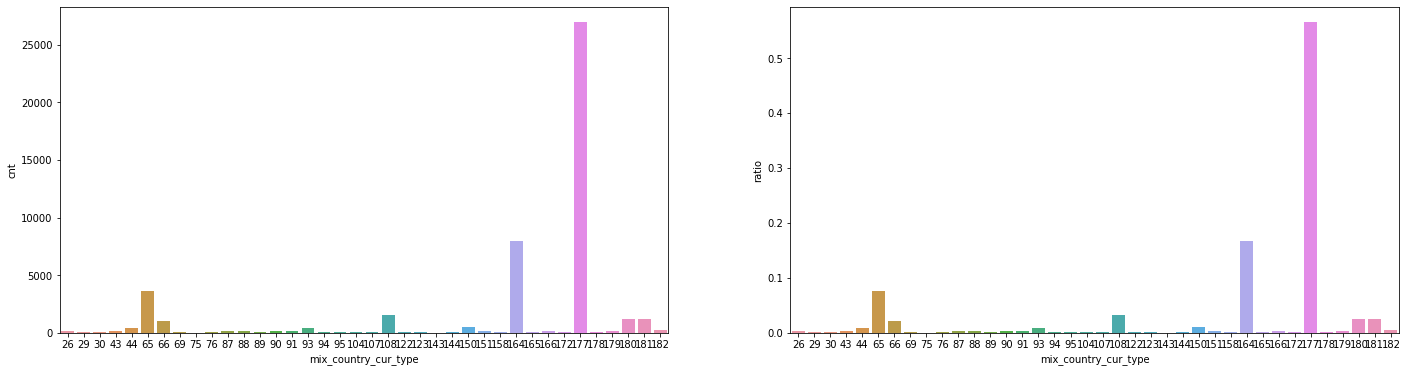

In [45]:
plt.figure(figsize=(24,6))
plt.subplot(1, 2, 1)
sns.barplot(x='mix_country_cur_type', y='cnt', data=d2.query('cnt > 20'))

plt.subplot(1, 2, 2)
sns.barplot(x='mix_country_cur_type', y='ratio', data=d2.query('cnt > 20'))

In [48]:
cust_cdtx.groupby(['sar_flag']).agg({'amt':['mean','median']})

amt        
                  mean  median
sar_flag                      
0.0       15347.122612  1360.0
1.0       16154.521028   861.0

In [53]:
cust_cdtx.amt.describe()

count    1.043157e+06
mean     5.821918e+03
std      1.670955e+05
min      0.000000e+00
25%      1.950000e+02
50%      4.860000e+02
75%      1.826000e+03
max      1.277207e+08
Name: amt, dtype: float64

In [65]:
d = cust_cdtx[['amt','sar_flag']]

bins = [-np.inf, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000, np.inf]
labels = [x for x in range(len(bins)-1)]
d['amt_group'] = pd.cut(d.amt, bins=bins, labels=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
d0 = d.groupby(['amt_group','sar_flag']).size().reset_index(name='cnt')
d1 = d0.query('sar_flag==1')
d1['ratio'] = d1['cnt']/d1['cnt'].sum()

d2 = d0.query('sar_flag==0')
d2['ratio'] = d2['cnt']/d2['cnt'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


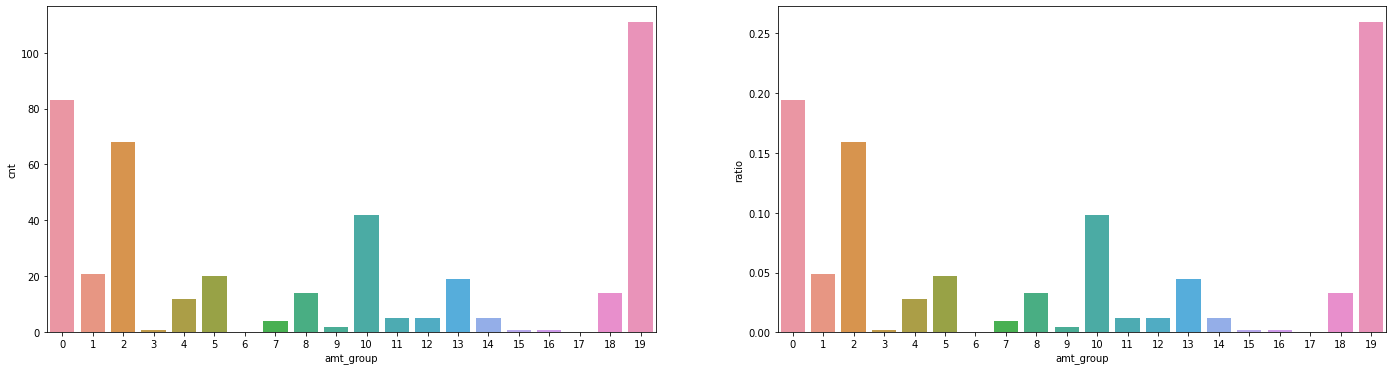

In [75]:
plt.figure(figsize=(24,6))
plt.subplot(1, 2, 1)
sns.barplot(x='amt_group', y='cnt', data=d1)

plt.subplot(1, 2, 2)
sns.barplot(x='amt_group', y='ratio', data=d1)

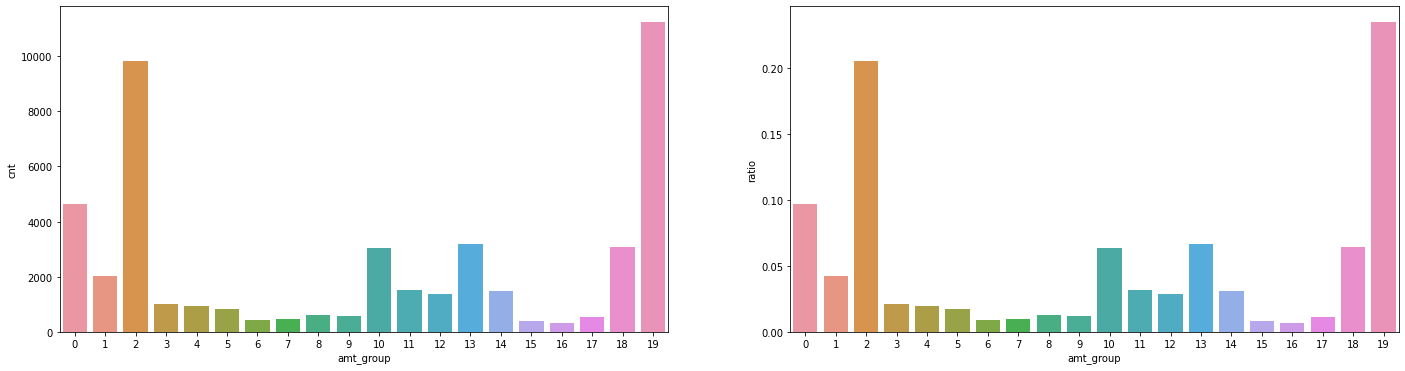

In [74]:
plt.figure(figsize=(24,6))
plt.subplot(1, 2, 1)
sns.barplot(x='amt_group', y='cnt', data=d2)

plt.subplot(1, 2, 2)
sns.barplot(x='amt_group', y='ratio', data=d2)